In [1]:
import numpy as np
from dataclasses import dataclass
import json
import glob
from ase.calculators.calculator import Calculator
from sch_benchmark.infer import compute_hutchison, compute_ionic_conformers, compute_rotamer, compute_tautobase, compute_all
from sch_benchmark.io import load_hutchison_task, load_ionic_conformers_task
from sch_benchmark.analysis import analyse_hutchison, analyse_ionic_conformers, analyse_rotamer, analyse_tatobase
import matplotlib.pyplot as plt


class FakeCalc(Calculator):

    def get_potential_energy(self, atoms, force_consistent=None):
        return 0.0

    def get_forces(self, atoms=None):
        return np.zeros((len(atoms), 3))

In [2]:
calc = FakeCalc()

compute_all(calc, name="fake")

  0%|          | 0/1649 [00:00<?, ?it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 10%|█         | 172/1649 [00:00<00:00, 1699.52it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 22%|██▏       | 358/1649 [00:00<00:00, 1791.98it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 33%|███▎      | 552/1649 [00:00<00:00, 1851.98it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 45%|████▍     | 738/1649 [00:00<00:00, 1542.66it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 55%|█████▍    | 899/1649 [00:00<00:00, 1460.78it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 64%|██████▎   | 1050/1649 [00:00<00:00, 1309.80it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 76%|███████▌  | 1248/1649 [00:00<00:00, 1493.52it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:54        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 85%|████████▌ | 1404/1649 [00:00<00:00, 1382.37it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 95%|█████████▍| 1564/1649 [00:01<00:00, 1440.18it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:50:55        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

100%|██████████| 1552/1552 [00:00<00:00, 35255.03it/s]


/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


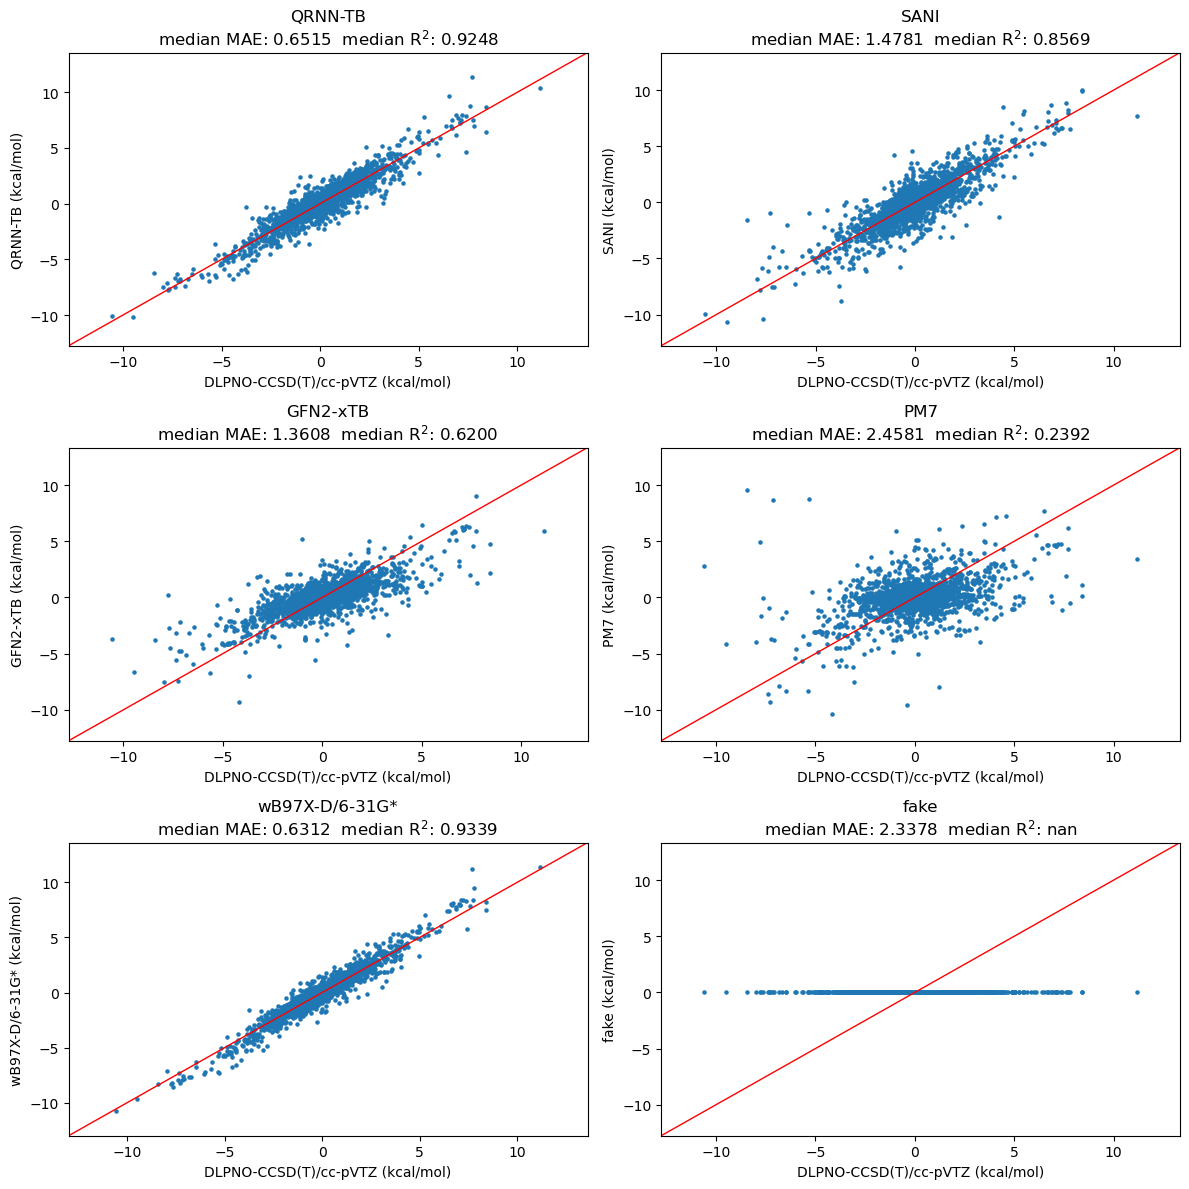

In [3]:
analyse_hutchison(name="fake")

5582/5958 data remain after filtering


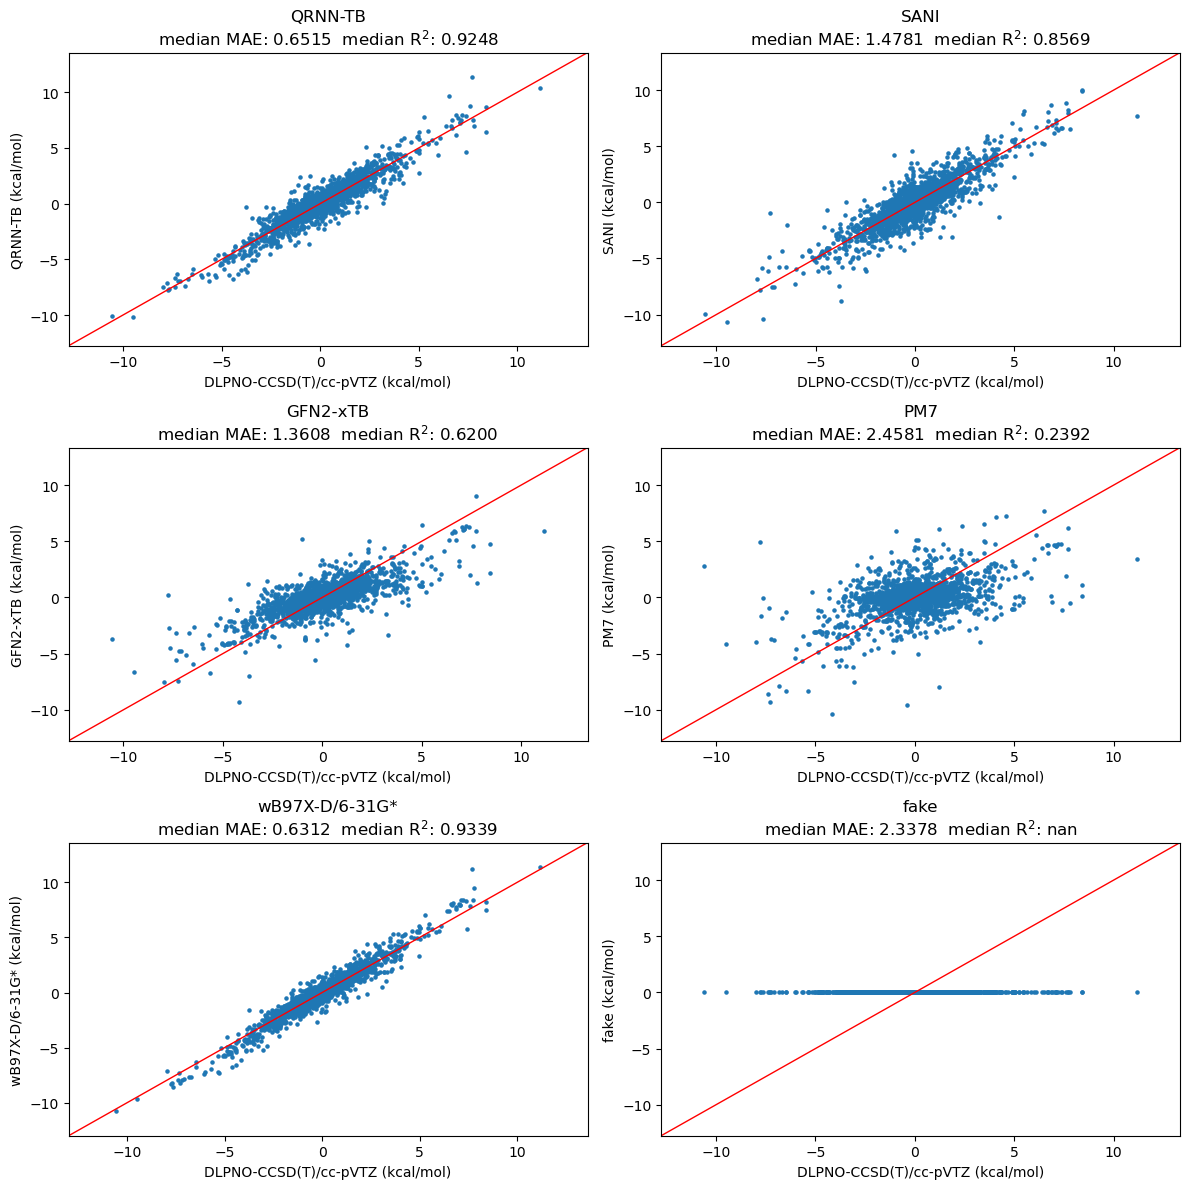

In [4]:
filter = lambda x: x.charge == 0

analyse_hutchison(name="fake", filter=filter)

376/5958 data remain after filtering


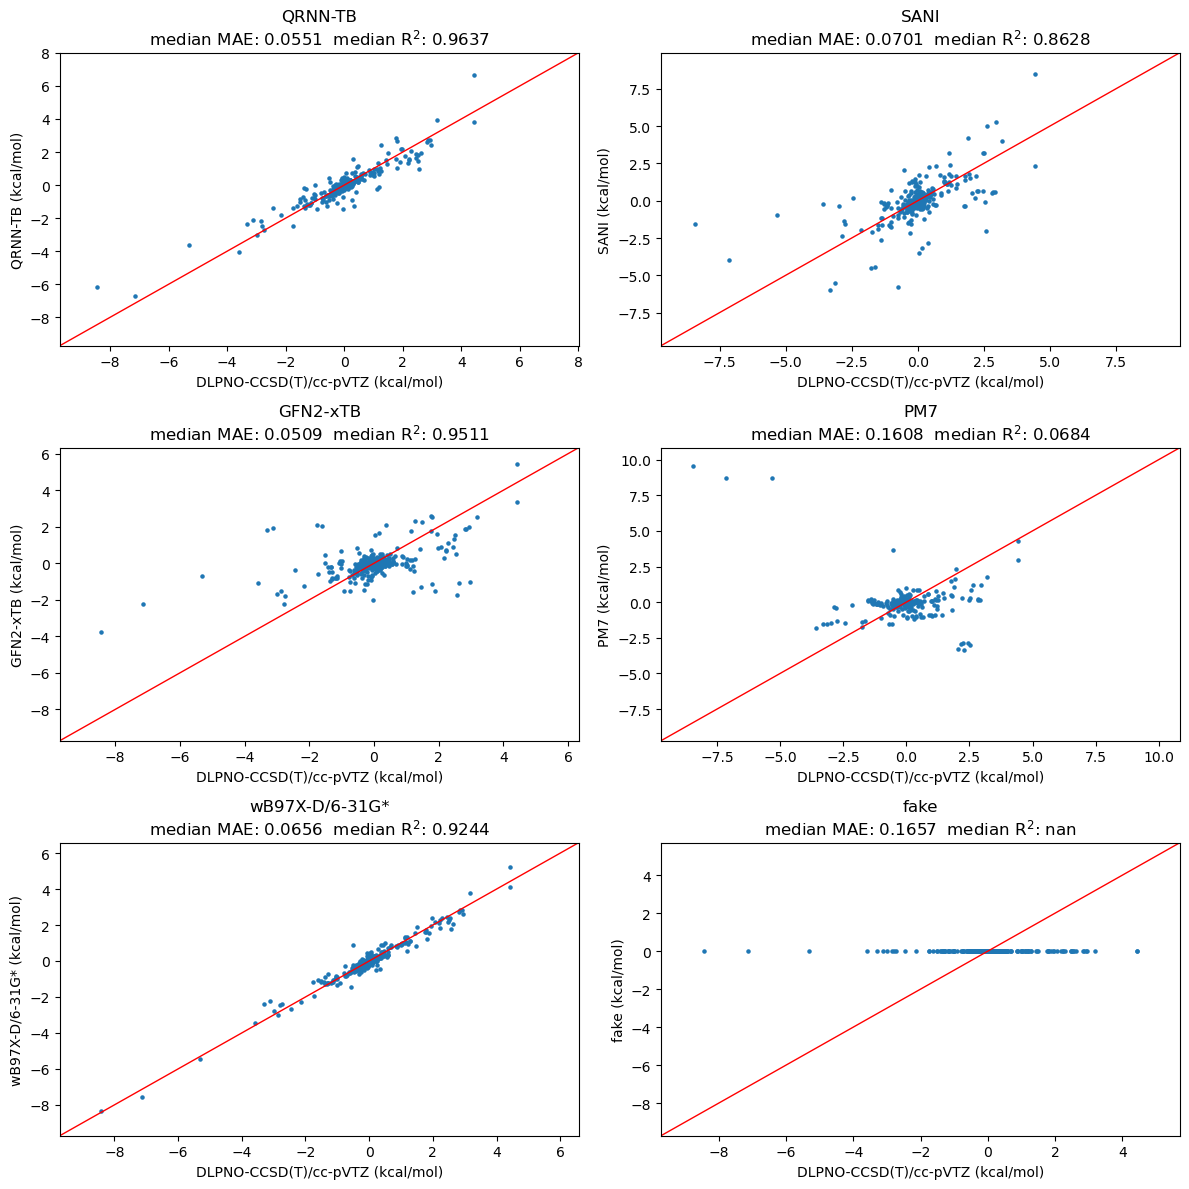

In [5]:
filter = lambda x: x.charge != 0

analyse_hutchison(name="fake", filter=filter)

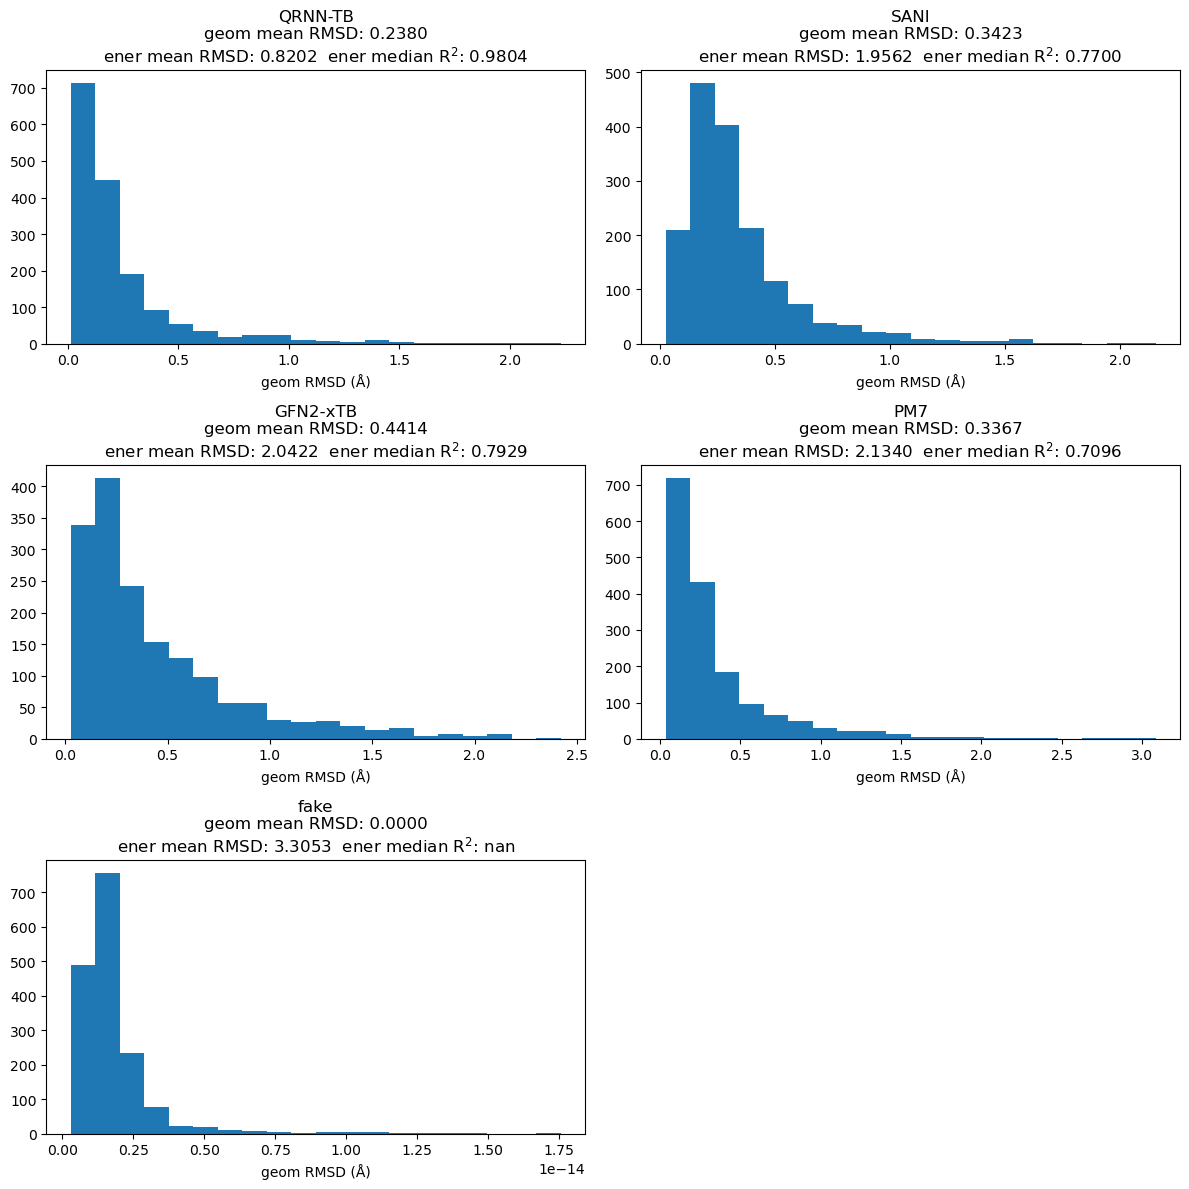

In [6]:
analyse_ionic_conformers(name="fake")

146/1649 data remain after filtering


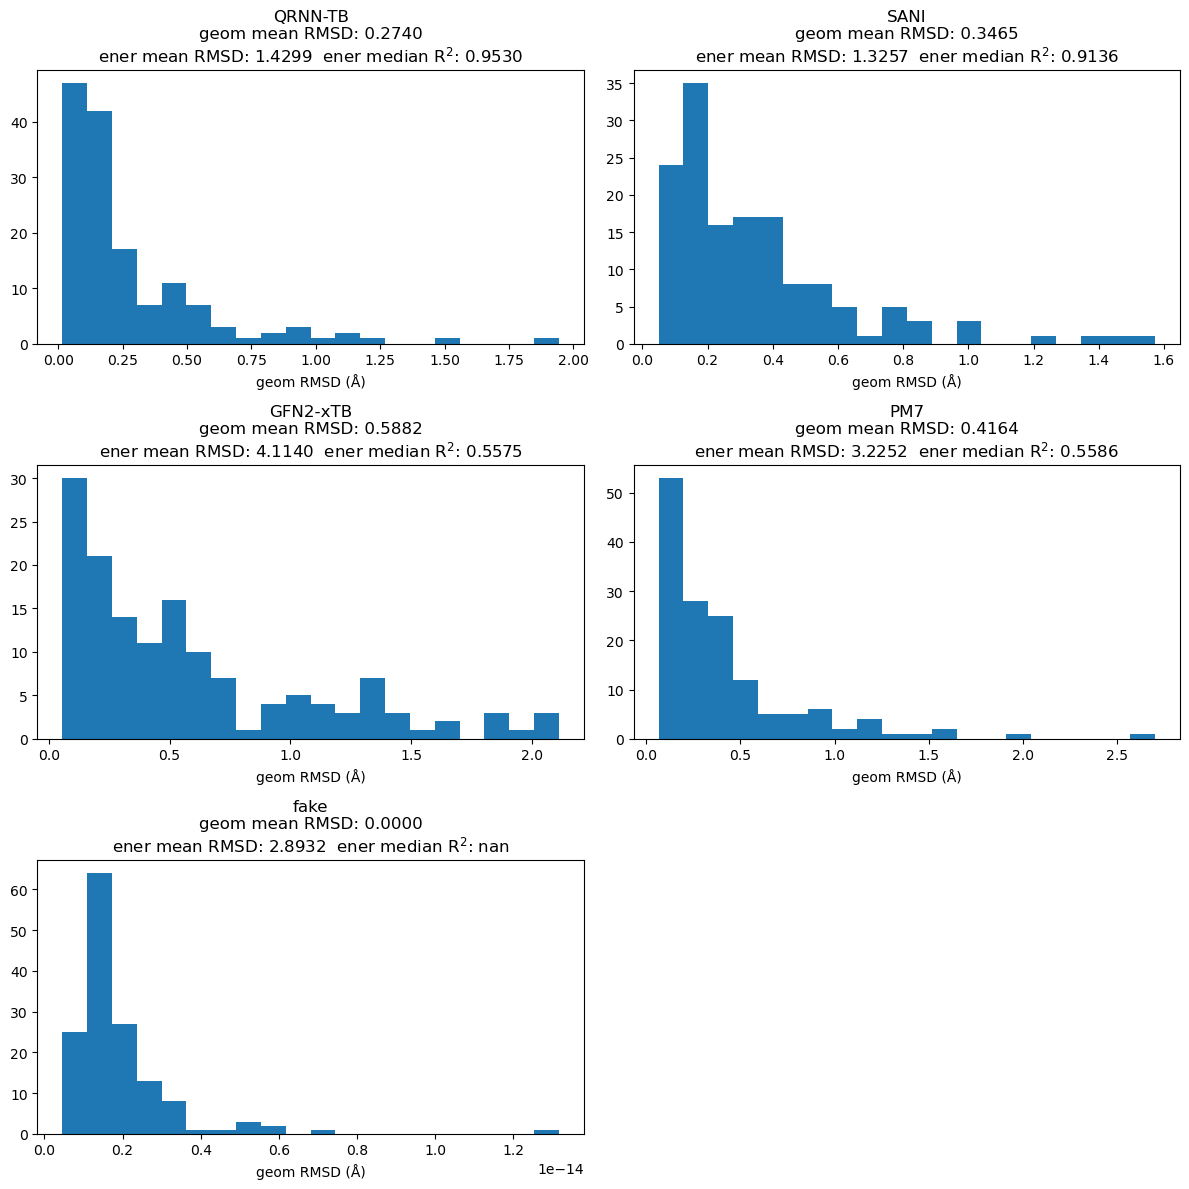

In [7]:
filter = lambda x: x.charge == 0

analyse_ionic_conformers(name="fake", filter=filter)

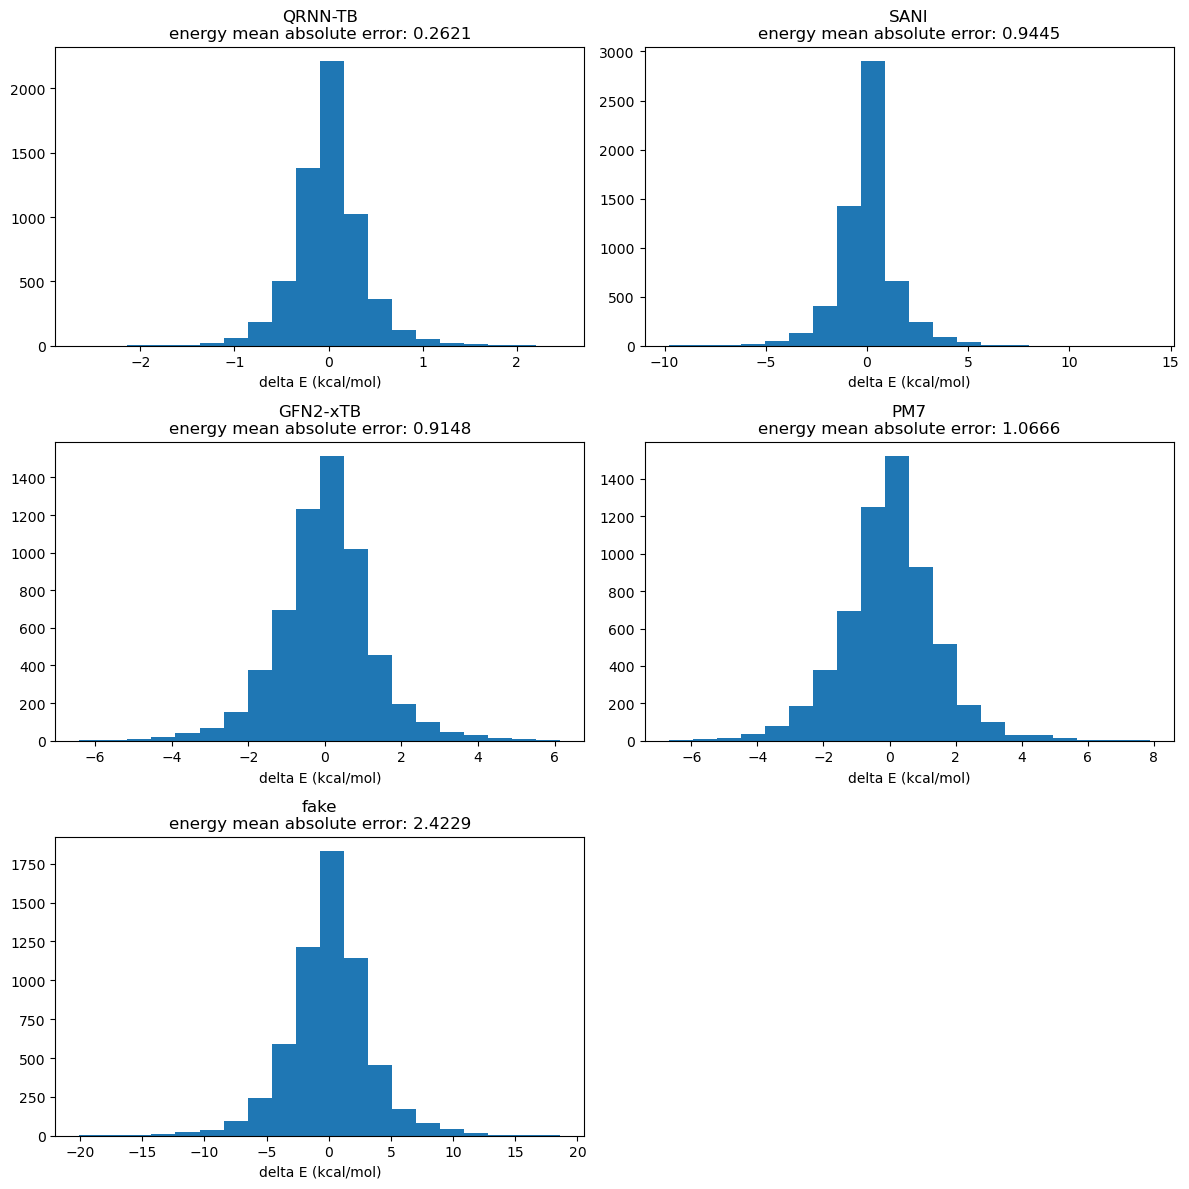

In [8]:
analyse_rotamer(name="fake")

144/500 data remain after filtering


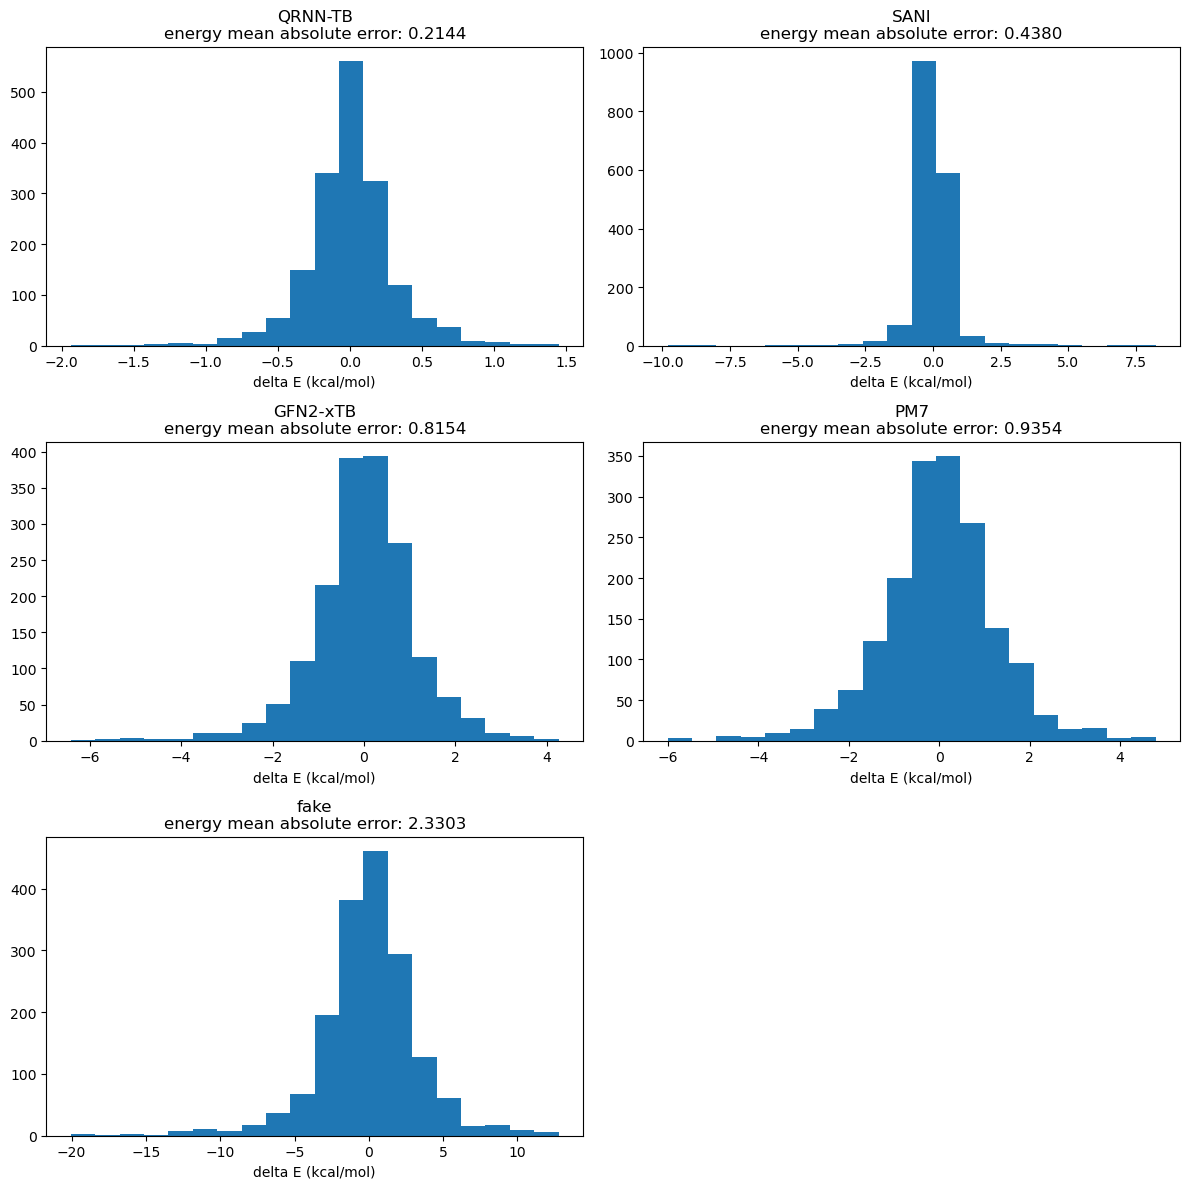

In [9]:
filter = lambda x: x.charge == 0

analyse_rotamer(name="fake", filter=filter)

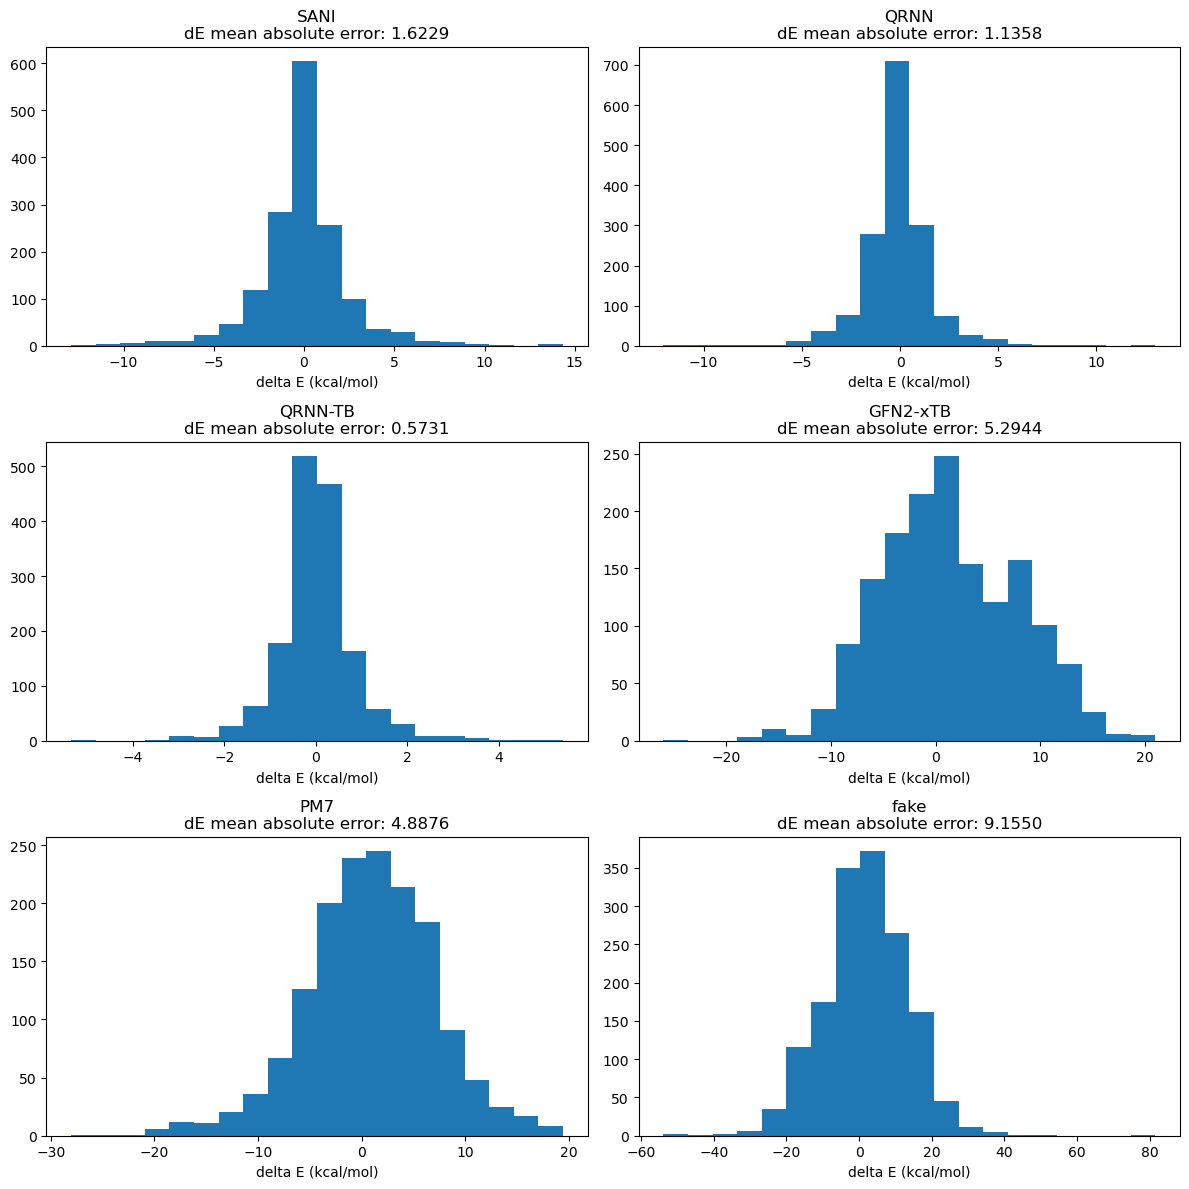

In [10]:
analyse_tatobase(name="fake")

1545/1552 data remain after filtering


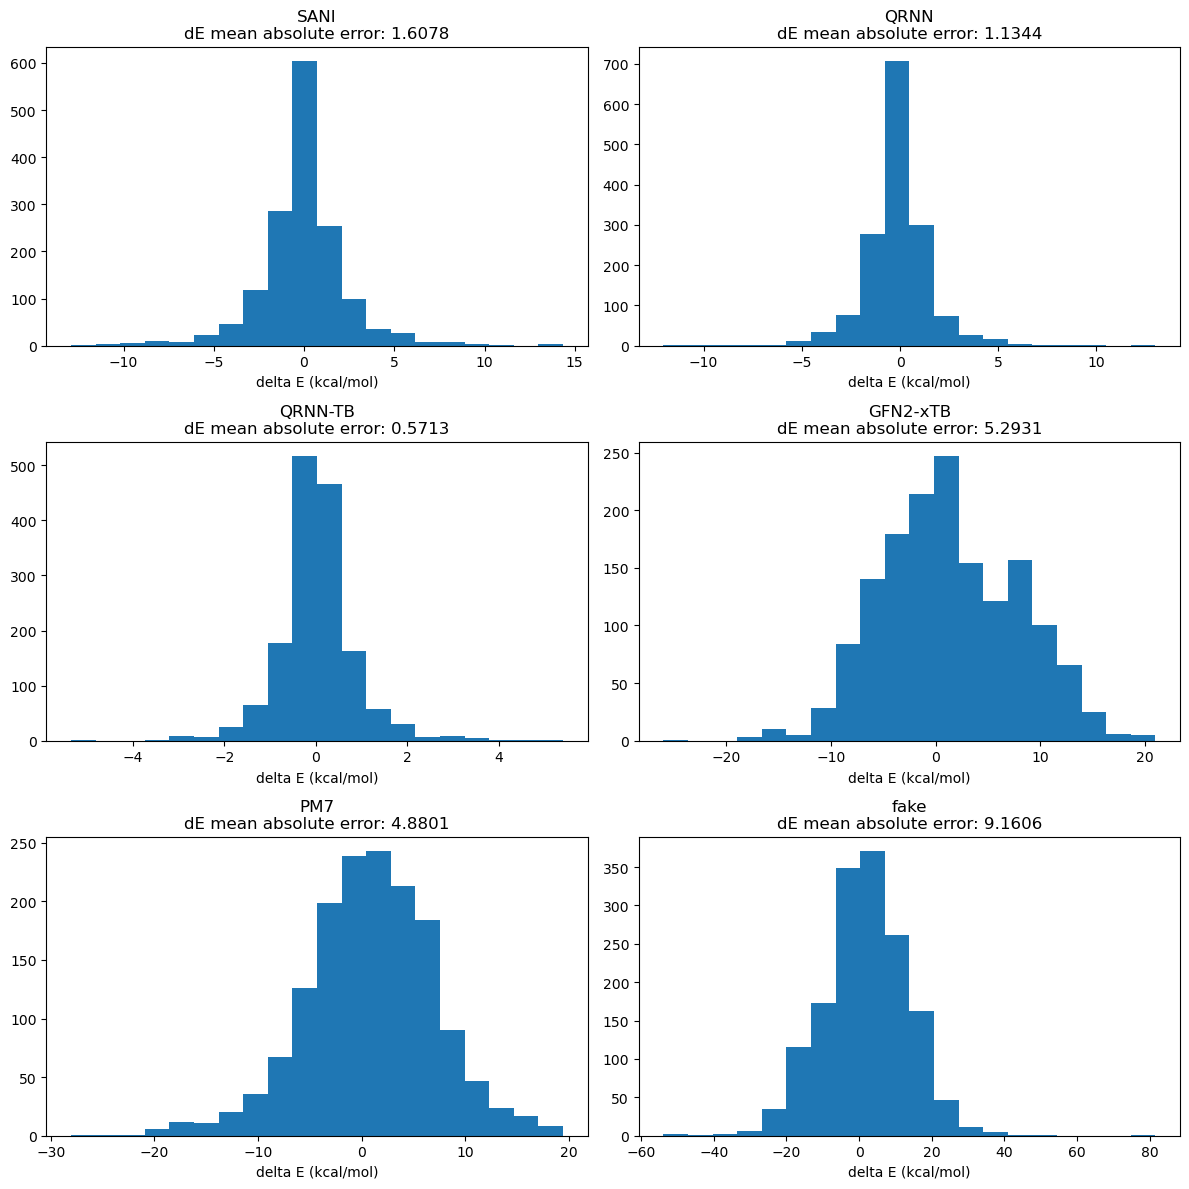

In [11]:
filter = lambda x: x.charge == 0

analyse_tatobase(name="fake", filter=filter)